<img src="logo_small.png">

# The Spark Foundation

### Prediction using Unsupervised ML

#### Task : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
pca = PCA(4)
 
#Transform the data
df = pca.fit_transform(data)

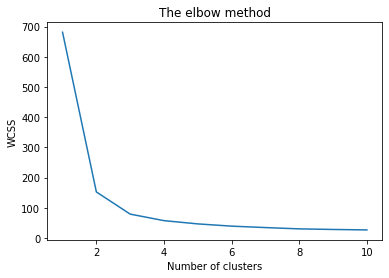

In [3]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [4]:
# Building the model with 3 clusters
k_means = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++', max_iter = 300, n_init = 10)

k_means.fit(df)

labels = k_means.labels_
centers = k_means.cluster_centers_

In [5]:
# Predicted cluster labels
label = k_means.fit_predict(df)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

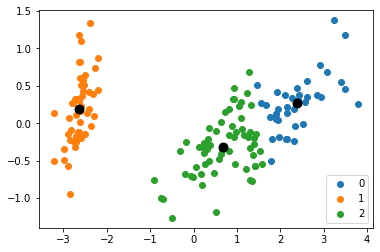

In [6]:
#plotting the results:
centroids = k_means.cluster_centers_
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

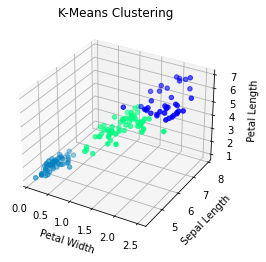

In [7]:
# plotting 3d graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['petal width (cm)'],data['sepal length (cm)'], data['petal length (cm)'],
                     c=label,s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
plt.show()

### Like, Comment & Share